# Data Analysis

**The description of the data source is avaiable in the main README file for the project.**

**The 3 research questions that the analysis aims to answer are as follows:**

>***1*** *Based on the frequenct of voting, realization of the importance of voting, and the reasons provided by non-frequent voters for not voting, do Americans seem to have a mistaken impression about the concept of voting?*
>>***1.1*** *What is the distribution of Americans based on their frequency of voting?*
>>
>>***1.2*** *What views do they have about the importance of voting based on their age and gender?*
>>
>>***1.3*** *For Americans who rarely or never vote, what were the reasons for not voting?*

>***2*** *How difficult do Americans think it is to vote in the national elections? Does age play a role in this thinking?*

>***3*** *Do Americans think that the design and structure of the American Government need change? Does age play a role in this thinking?*

*The first question is the key research question, the results for which have also been portrayed in the form of a Tableau dashboard which can be found as a separate file in this project.*

**The analysis has been divided into sections based on the particular research question it corresponds to and the part of the complete raw data that it studies to answer it.**

**Each section contains the following sub-sections:**

- ***Dataset*** *(describing the attributes of the filtered data used for the particular section and basic profiling/analysis of the data)*
- ***Visualization*** *(containing the plots and the description of its elements)*
- ***Analysis*** *(providing the reasoning for the selection of a particular plot and the inferences that can be drawn from the plotted data)*
- ***Conclusion*** *(summarizes how the analysis answers a research question or a part of it)*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from scripts import project_functions

## *Section 1 (Research Question 1)*

### Dataset

This section consists of two dataframes. These first dataset corresponds to the first two subcomponents of Research Question 1 i.e. 1_1 and 1_2 while the second dataset corresponds to subcomponent 3 i.e. 1_3. The analysis of this data provides the answer to the first research question. The dataframes are returned by a python script which filters/wrangles the data based on the needs for a particular section. It can be viewed under the scripts directory.

**Dataset 1**

This dataset includes the data filtered specifically for help to answer the first research question. Basic descriptive analysis of the numeric and non-numeric columns has also been conducted. The description of each column is as follows:
- id: the unique ID of each participant
- ppage: the age of a participant
- gender: the gender of a participant
- educ: the education level of a participant
- race: the race of a participant
- cat: the voter category of a participant which refers to the frequent of voting (3 values)
    - always votes
    - votes sometimes
    - rarely or never votes
- voting_imp: the level of importance given to voting by each participant (values 1 to 4)
    - 1: very important
    - 2: somewhat important
    - 3: not so important
    - 4: not at all important

In [2]:
sns.set_theme(style = 'darkgrid', font_scale = 1.4)
df1 = project_functions.load_and_process("../data/raw/nonvoters_data.csv", 1)
df1

,id,ppage,gender,educ,race,cat,voting_imp
0,470001,73,Female,College,White,always,1
1,470002,90,Female,College,White,always,1
2,470003,53,Male,College,White,sporadic,1
3,470007,58,Female,Some college,Black,sporadic,1
4,470008,68,Female,Some college,Other/Mixed,always,1
...,...,...,...,...,...,...,...
5796,488266,59,Male,High school or less,Hispanic,always,1
5797,488274,44,Male,College,Hispanic,sporadic,1
5798,488278,40,Female,Some college,Hispanic,always,1
5799,488322,51,Male,College,Other/Mixed,sporadic,1


In [3]:
df1.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,5801.0,474655.027926,3628.528555,470001.0,472068.0,474156.0,476221.0,488325.0
ppage,5801.0,51.669885,17.070174,22.0,36.0,54.0,65.0,94.0
voting_imp,5801.0,1.259955,0.638693,1.0,1.0,1.0,1.0,4.0


In [4]:
df1.describe(exclude = [np.number]).T

,count,unique,top,freq
gender,5801,2,Male,2925
educ,5801,3,College,2324
race,5801,4,White,3694
cat,5801,3,sporadic,2561


**Dataset 2**

This dataset includes the data filtered specifically for help to answer the first research question. Basic descriptive analysis of the numeric and non-numeric columns has also been conducted. The description of each column is as follows:
- ppage: the age of a participant
- gender: the gender of a participant
- cat: the voter category of a participant which refers to the frequent of voting (3 values)
    - always votes
    - votes sometimes
    - rarely or never votes
- Q29 and its sub-divisions: Considering the last few elections where the participant did not vote, what was the reason for deciding not to vote? The participants chose from the following options. The value of 1 under these columns indicated a choice. The NaN values can be ignored for now. They need to be separately removed for each of the 9 alternatives separately which has been done further during the visual analysis
    - Q29_1: I didn’t like any of the candidates
    - Q29_2: Because of where I live, my vote doesn’t matter
    - Q29_3: No matter who wins, nothing will change for people like me
    - Q29_4: Our system is too broken to be fixed by voting
    - Q29_5: I wanted to vote, but I didn’t have time, couldn’t get off work, something came up, or I forgot
    - Q29_6: I’m not sure if I can vote
    - Q29_7: Nobody talks about the issues that are important to me personally
    - Q29_8: All the candidates are the same
    - Q29_9: I don’t believe in voting

In [5]:
df2 = project_functions.load_and_process("../data/raw/nonvoters_data.csv", 2)
df2

,ppage,gender,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,cat
0,22,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always
1,22,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always
2,22,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always
3,22,Male,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,always
4,22,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always
...,...,...,...,...,...,...,...,...,...,...,...,...
5831,91,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sporadic
5832,92,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always
5833,92,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always
5834,92,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,always


In [6]:
df2.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
ppage,5836.0,51.693797,17.071561,22.0,36.0,54.0,65.0,94.0
Q29_1,1342.0,-0.460507,0.887987,-1.0,-1.0,-1.0,1.0,1.0
Q29_2,1342.0,-0.757079,0.653567,-1.0,-1.0,-1.0,-1.0,1.0
Q29_3,1342.0,-0.399404,0.917117,-1.0,-1.0,-1.0,1.0,1.0
Q29_4,1342.0,-0.600596,0.799851,-1.0,-1.0,-1.0,-1.0,1.0
Q29_5,1342.0,-0.658718,0.752670,-1.0,-1.0,-1.0,-1.0,1.0
Q29_6,1342.0,-0.926975,0.375264,-1.0,-1.0,-1.0,-1.0,1.0
Q29_7,1342.0,-0.758569,0.651835,-1.0,-1.0,-1.0,-1.0,1.0
Q29_8,1342.0,-0.697466,0.716885,-1.0,-1.0,-1.0,-1.0,1.0
Q29_9,1342.0,-0.810730,0.585638,-1.0,-1.0,-1.0,-1.0,1.0


In [7]:
df2.describe(exclude = [np.number]).T

,count,unique,top,freq
gender,5836,2,Male,2940
cat,5836,3,sporadic,2574


### Visualization

This section consists of 11 plots. The first 2 plots utilize dataset 1 while the other make use of dataset 2. The description of the elements of each plot has been provided ahead. Plots 3-11 use a similar format; therefore, a single description has been provided for these plots.

**Plot 1**

This pie plot represents the distribution of the voters based on their frequency of participation in voting. The blue section corresponds to 'always', green to ' sporadic' (or sometimes), and orange to 'rarely/never'. This helps to understand the distribution and proportion of participants out of all participants that belong to each category.

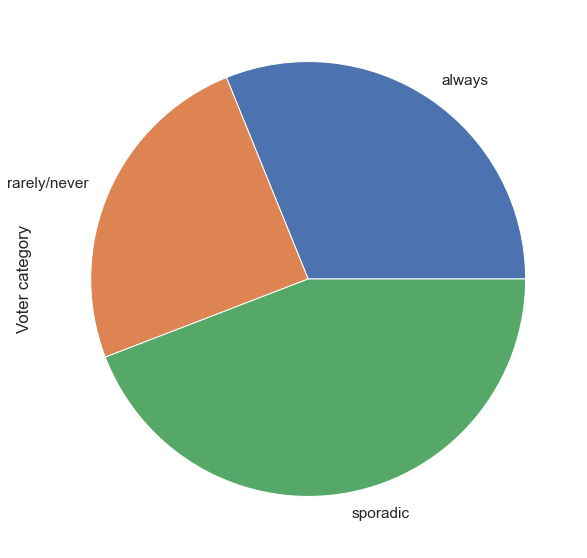

In [8]:
group = df1.groupby('cat').size()
plot1 = group.plot.pie(figsize=(10, 10)).set(ylabel = 'Voter category')

**Plot 2**

This box plot represents the distribution of the level of importance of voting along the age and gender of participants. The blue section corresponds to 'female' and orange to 'male'. The y-axis represents the age and the x-axis represents the responses from 1 - 4 given by the participants portraying the importance of voting. This helps to understand the how important do participants seem to think voting is, and how does this thinking differ on the basis of age and gender.

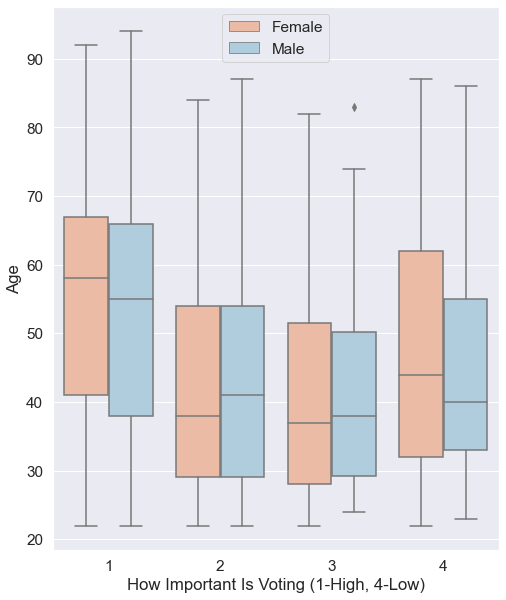

In [9]:
plt.figure(figsize=(8,10))
plot2 = sns.boxplot(x = 'voting_imp', y = 'ppage', hue = 'gender', data = df1, palette = 'RdBu').set(xlabel = 'How Important Is Voting (1-High, 4-Low)', ylabel = 'Age')
plt.legend(loc='upper center')

**Plots 3-11**

These count plots 3-11 each refer to an alternative as described abode under the dataset description. Sub-dataframes have been created for each plot to remove the large number of NaN values separately for each question/alternative. These NaN values are not missing data, instead, they imply that the current alternative was not chosen as a reason for not voting. They show the distribution of participants who chose the current alternative on the basis of their frequency of voting and gender.
- x-axis: the category of voters
- y-axis: the count of participants who chose the current alternative
    - the y-axis also describes what the alternative is
- further classification based on gender

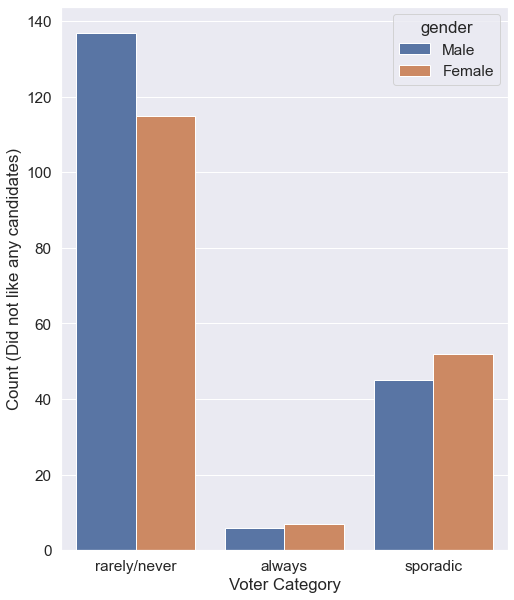

In [10]:
df2_1 = df2.drop(df2.loc[df2['Q29_1'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot3 = sns.countplot(x="cat", hue="gender", data=df2_1).set(xlabel = 'Voter Category', ylabel = 'Count (Did not like any candidates)')

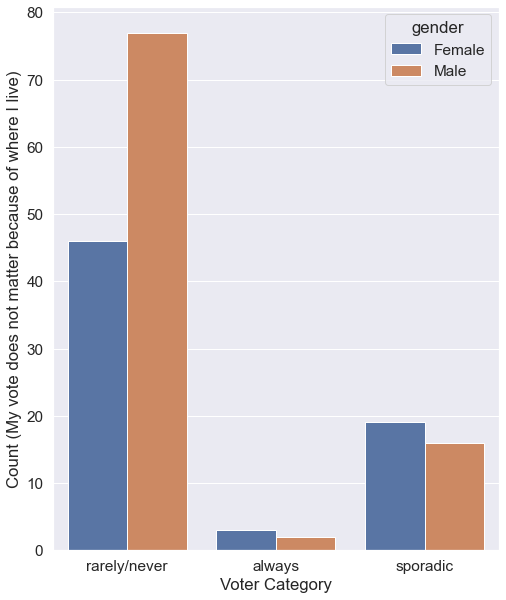

In [11]:
df2_2 = df2.drop(df2.loc[df2['Q29_2'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot4 = sns.countplot(x="cat", hue="gender", data=df2_2).set(xlabel = 'Voter Category', ylabel = 'Count (My vote does not matter because of where I live)')

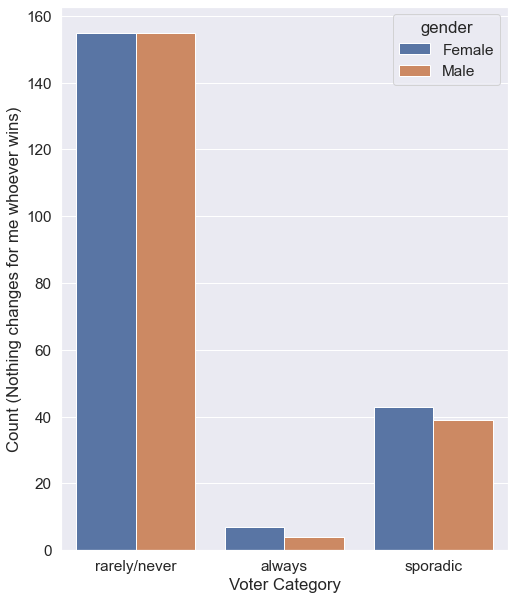

In [12]:
df2_3 = df2.drop(df2.loc[df2['Q29_3'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot5 = sns.countplot(x="cat", hue="gender", data=df2_3).set(xlabel = 'Voter Category', ylabel = 'Count (Nothing changes for me whoever wins)')

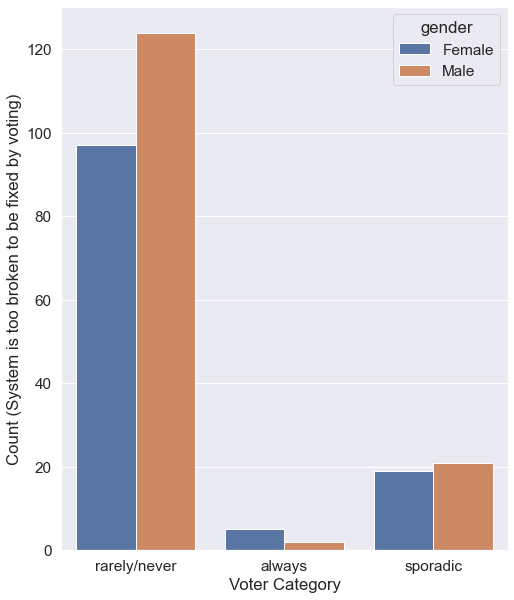

In [13]:
df2_4 = df2.drop(df2.loc[df2['Q29_4'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot6 = sns.countplot(x="cat", hue="gender", data=df2_4).set(xlabel = 'Voter Category', ylabel = 'Count (System is too broken to be fixed by voting)')

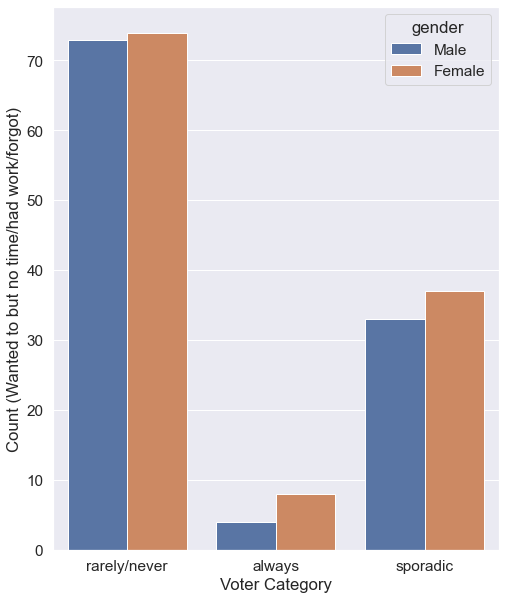

In [14]:
df2_5 = df2.drop(df2.loc[df2['Q29_5'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot7 = sns.countplot(x="cat", hue="gender", data=df2_5).set(xlabel = 'Voter Category', ylabel = 'Count (Wanted to but no time/had work/forgot)')

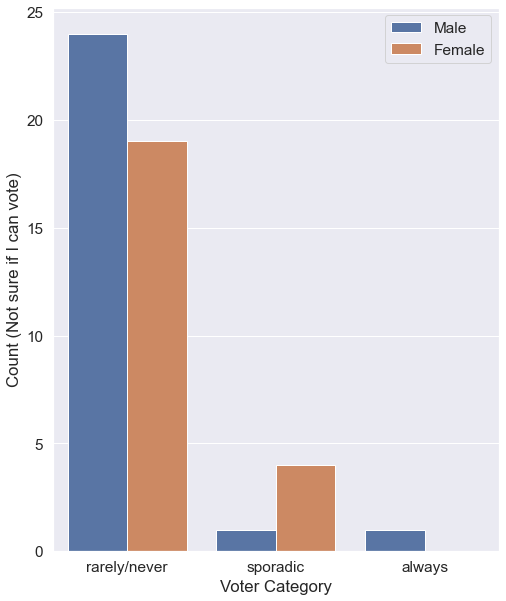

In [15]:
df2_6 = df2.drop(df2.loc[df2['Q29_6'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot8 = sns.countplot(x="cat", hue="gender", data=df2_6).set(xlabel = 'Voter Category', ylabel = 'Count (Not sure if I can vote)')
plt.legend(loc='upper right')

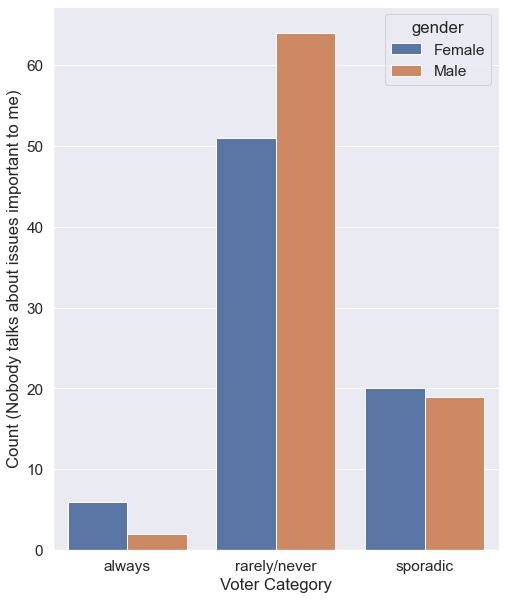

In [16]:
df2_7 = df2.drop(df2.loc[df2['Q29_7'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot9 = sns.countplot(x="cat", hue="gender", data=df2_7).set(xlabel = 'Voter Category', ylabel = 'Count (Nobody talks about issues important to me)')

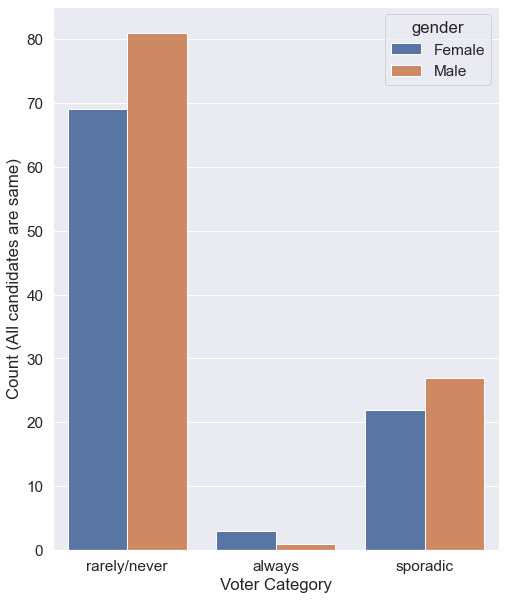

In [17]:
df2_8 = df2.drop(df2.loc[df2['Q29_8'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot10 = sns.countplot(x="cat", hue="gender", data=df2_8).set(xlabel = 'Voter Category', ylabel = 'Count (All candidates are same)')

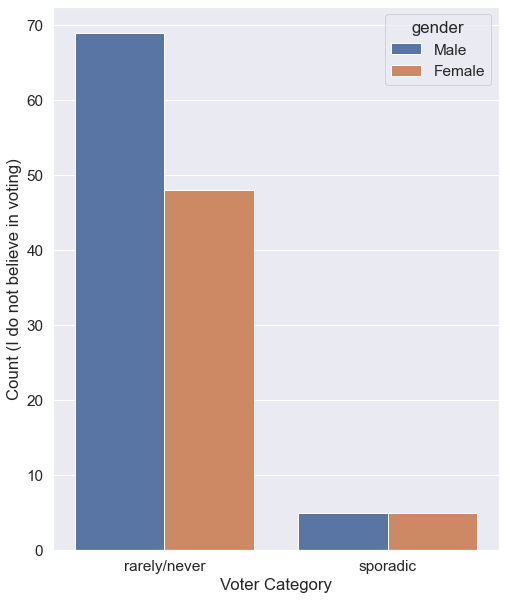

In [18]:
df2_9 = df2.drop(df2.loc[df2['Q29_9'] < 1].index).dropna()
plt.figure(figsize=(8,10))
plot11 = sns.countplot(x="cat", hue="gender", data=df2_9).set(xlabel = 'Voter Category', ylabel = 'Count (I do not believe in voting)')

### Analysis

This analysis corresponds to research question 1 and details the following:
- the reason behind selection of the particular plots
- the inferences that can be drawn from the visual data in the form of pointers.

The formation and description of a conclusion on the basis of the analysis is detailed further in the conclusion section.

***Selection of specific plots***
- *Pie plot*: It is one of the best choices when we have only one categoric variable. This plot was chosed to represent the distribution of voters based on the frequency of their participation in voting because it provides the best visual representation of how many participants of each type are present. It is easy to know the proportion of the total participants that each of the three categories hold.
- *Box plot*: It is one of the best choices when we have a numeric and a categoric variable with several numeric observations per category. This can further by subclassified on the basis of gender. It makes the distinction between distribution of the choices made on the basis of age and gender easier.
- *Count plot*: This is one of the best choices when the count of a specific category needs to be put under analysis. It was chosed for the 9 subsequent plots because it provides an easy way to distinguish between the number of voters, based on their category (further based on gender), who chose not to vote due to a specific reason. It allows us to study the difference between the selections based on what category the participants belong to.

***Inferences drawn from the plots (in the form of pointers):***
- Plot 1
    - The maximum number of participants are the ones who vote sometimes (not rarely or always)
    - There is practically not much difference between the participants who vote rarely and who always vote.
    - These inferences were drawn by looking at the proportion of the whole pie that each category covers.
- Plot 2
    - The average age of the participants who consider voting important is in the higher 50s.
    - It can be clearly observed, and quite interestingly, that older people tend to realize the importance of voting more than the young ones as the average age shown by the boxplot is clearly the highest for selection 1 (very important).
    - There is practically not much observable difference based on the gender of the participants. While the age spread for females is higher in case of option 4 (no importance), the overall distribution seems quite similar.
    - The impact of age on this distribution is clearly visible and has been clearly described.
- Plot 3-11
    - The maximum number of participants for each of the plots/alternatives are the ones who rarely or never vote.
    - This is good and in line with the practicality of the data as the ones who vote less should be the ones to most likely choose one of the options.
    - The different plots were created for a visual impact when put on a dashboard or single sheet to compare the choices made by the participants.
    - The bar corresponding to females can be seen to be higher in most of the plots implying that females tend to vote lesser than men due to these particular reasons.
    - Not being sure of their ability to vote was the least popular choice.
    - Thinking that nothing changes for the participant whichever candidate wins was the most popular choice.
    - This can be figured out based on the maximum count of each of the plots.
    - The participants who almost vote sometimes have significantly lower count for each plot/alternative which is good and implies the trust in system that still exists within them.
    - The count of voters who almost always vote is quite negligible when compared to the other two categories.

### Conclusion

>***1*** *Based on the frequenct of voting, realization of the importance of voting, and the reasons provided by non-frequent voters for not voting, do Americans seem to have a mistaken impression about the concept of voting?*

Based on the analysis, the Americans who rarely vote seem to have mistaken impression about the concept of voting. While the 'sporadic' voters form the maximum part of the whole sample and the older people tend to realize the importance of voting better, the ones who rarely or never vote show significantly higher count in response to the provided alternatives as reasons not to vote. All the provided reasons are genuine feelings however can be rebutted with proper information and education.
***Many Americans who rarely/never vote, do not trust the concept of voting and have misconceptions about the same.***

## *Section 2 (Research Question 2)*

### Dataset

The dataframe is returned by a python script which filters/wrangles the data based on the needs for this particular section. It can be viewed under the scripts directory. This dataset includes the data filtered specifically for answering the second research question. Basic descriptive analysis of the numeric and non-numeric columns has also been conducted. The description of each column is as follows:
- ppage: the age of a participant
- gender: the gender of a participant
- difficulty: the level of difficulty participants find to vote in the national elections (values 1 to 4)
    - 1: very easy
    - 2: somewhat easy
    - 3: somewhat difficult
    - 4: very difficult

In [19]:
df3 = project_functions.load_and_process("../data/raw/nonvoters_data.csv", 3)
df3

,difficulty,ppage,gender
0,1,22,Female
1,2,22,Male
2,1,22,Female
3,3,22,Male
4,2,22,Male
...,...,...,...
5775,2,91,Male
5776,1,92,Male
5777,2,92,Female
5778,1,92,Female


In [20]:
df3.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
difficulty,5780.0,1.645848,0.804260,1.0,1.0,1.0,2.0,4.0
ppage,5780.0,51.724740,17.068306,22.0,37.0,54.0,65.0,94.0


In [21]:
df3.describe(exclude = [np.number]).T

,count,unique,top,freq
gender,5780,2,Male,2916


### Visualization

This section consists of 2 plots. These two plots allow for answering research question 2. The description of the elements of each plot has been provided ahead.

**Plot 1**

This count plot represents the choices made by the participants answering how difficult it is to vote in the national election. The distribution shows the count of participants who chose a particular option which has also been sub-classified based on their gender.
- x-axis: the count of voters who chose a particular alternative
- y-axis: the 4 provided alternatives
    - from 1 (easiest) to 4 (most difficult)
- further classification based on gender

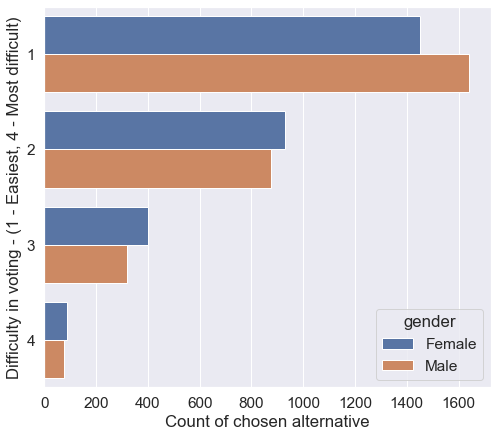

In [22]:
plt.figure(figsize=(8,7))
plot11 = sns.countplot(y="difficulty", hue="gender", data=df3).set(ylabel = 'Difficulty in voting - (1 - Easiest, 4 - Most difficult)', xlabel = 'Count of chosen alternative')

**Plot 2**

This violin plot represents the choices made by the participants answering how difficult it is to vote in the national election based on the age of the participants. The plot shows the distribution of participants for each choice based on their age and gender. This helps to understand how the thinking and choices of the participants differ based on age and gender.
- x-axis: the 4 provided alternatives
    - from 1 (easiest) to 4 (most difficult)
- y-axis: the age of the voters
- further classification based on gender

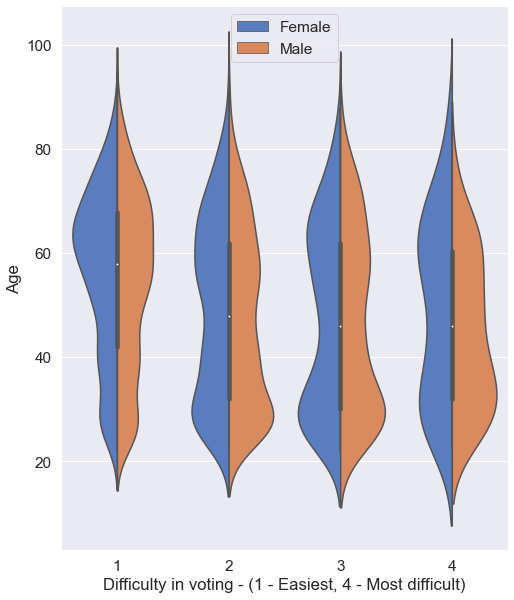

In [23]:
plt.rc("axes.spines", top=False, right=False)
plt.figure(figsize=(8,10))
plot12 = sns.violinplot(x = 'difficulty', y = 'ppage', hue = 'gender', data = df3, palette = 'muted', split = True).set(xlabel = 'Difficulty in voting - (1 - Easiest, 4 - Most difficult)', ylabel = 'Age')
plt.legend(loc='upper center')

### Analysis

This analysis corresponds to research question 2 and details the following:
- the reason behind selection of the particular plots
- the inferences that can be drawn from the visual data in the form of pointers.

The formation and description of a conclusion on the basis of the analysis is detailed further in the conclusion section.

***Selection of specific plots***
- *Count plot*: This is one of the best choices when the count of a specific category needs to be put under analysis. It was chosed because it provides an easy way to distinguish between the number of voters for each alternative, based on the difficulty level of their choice (further based on gender). It allows us to study the difference between the selections based on gender. These selections show how difficult they find to vote in the national elections.
- *Violin plot*: These plots contain all the data points unline some others with mean and error bars. Also, they work well for both quantitative and qualitative data even when the data does not follow a normal distribution. In the current case though, it is one of the best choices when the plot consists of a categoric variable and a numeric variable with multiple numeric values corresponding to a cetegory. It allows us to study the difference between the selection made by the participants for the difficulty of voting, on the basis of their age and gender.

***Inferences drawn from the plots (in the form of pointers):***
- Plot 1
    - The maximum number of participants find it easy to vote in the national elections.
    - The least number of participants find it the most difficult to vote in the national elections.
    - The count can be seen to be dropping almost uniformly as we go from the least difficult to the most difficult.
    - It can be seen that the bar for males is slightly higher in the case of option 1 (easiest) and slightly lower in all other cases.
    - This shows that compared to females, males tend to find the process slightly easier.
    - While the difference is not fairly large to consider this as a fact, the slight different can be interpreted as a slight difference in how difficult they find it based on their gender.
- Plot 2
    - The average age is higher for the participants who find voting to be the easiest.
    - The difference based on age is only visible clearly in the case of option 1 (easiest) while the age distribution is almost similar for the other three alternatives.
    - Again, the difference based on gender is not very visible.
    - We can stick to the analysis of the previous plot leading to a very minute difference based on gender as this graph does not state otherwise.
    - People of higher age can be visible seen to find it easier.
    - This is visible in the high average age for choices corresponding to easy and the larger spread (area-wise) of the plot for higher ages in case of choice 1 (easiest).
    - The maximum spread in age distribution can be seen for choice 4 (most difficult).

### Conclusion

>***2*** *How difficult do Americans think it is to vote in the national elections? Does age play a role in this thinking?*

Based of the analysis of the two plots, it can be concluded that participants generally seem to find it easier to vote in the national elections and age can be seen to have a very minor role in this choice. A possible explanation of why older people find it easier to vote is the higher amount of life experience. This answers our research question. ***Americans do not find it difficult to vote in the national elections and age has a fairly minor role to play in the same.***

## *Section 3 (Research Question 3)*

### Dataset

The dataframe is returned by a python script which filters/wrangles the data based on the needs for this particular section. It can be viewed under the scripts directory. This dataset includes the data filtered specifically for answering the second research question. Basic descriptive analysis of the numeric and non-numeric columns has also been conducted. The description of each column is as follows:
- id: the unique ID of each participant
- ppage: the age of a participant
- gender: the gender of a participant
- cat: the voter category of a participant which refers to the frequent of voting (3 values)
    - always votes
    - votes sometimes
    - rarely or never votes
- need_change: the answer to whether the design and structure of the American government need change
    - 1: yes (a lot of changes are needed)
    - 2: no (changes are not really needed)

In [24]:
df4 = project_functions.load_and_process("../data/raw/nonvoters_data.csv", 4)
df4

,id,need_change,ppage,gender,cat
0,470001,1,73,Female,always
1,470002,2,90,Female,always
2,470003,1,53,Male,sporadic
3,470007,1,58,Female,sporadic
4,470008,1,68,Female,always
...,...,...,...,...,...
5770,488266,1,59,Male,always
5771,488274,1,44,Male,sporadic
5772,488278,1,40,Female,always
5773,488322,2,51,Male,sporadic


In [25]:
df4.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,5775.0,474658.030303,3628.091408,470001.0,472071.5,474162.0,476222.5,488325.0
need_change,5775.0,1.191688,0.393663,1.0,1.0,1.0,1.0,2.0
ppage,5775.0,51.678095,17.073450,22.0,36.0,54.0,65.0,94.0


In [26]:
df4.describe(exclude = [np.number]).T

,count,unique,top,freq
gender,5775,2,Male,2914
cat,5775,3,sporadic,2553


### Visualization

This section consists of 2 plots. These two plots allow for answering research question 3. The description of the elements of each plot has been provided ahead.

**Plot 1**

This count plot represents the choices made by the participants answering whether the design and structure of the American government need change. The distribution shows the count of participants who chose a particular option which has also been sub-classified based on their gender.
- x-axis: the count of voters who chose a particular alternative
- y-axis: the 2 provided alternatives
    - 1: Yes
    - 2: No
- further classification based on gender

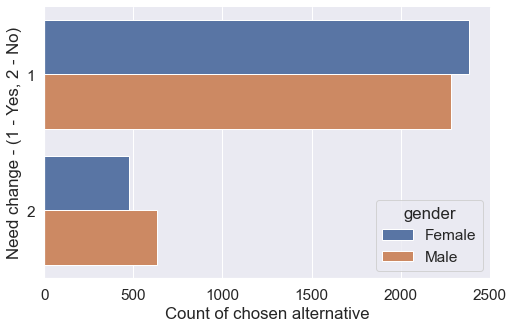

In [27]:
plt.figure(figsize=(8,5))
plot11 = sns.countplot(y="need_change", hue="gender", data=df4).set(ylabel = 'Need change - (1 - Yes, 2 - No)', xlabel = 'Count of chosen alternative')

**Plot 2**

This violin plot represents the choices made by the participants answering whether the design and structure of the American government need change, based on the age of the participants. The plot shows the distribution of participants for each choice based on their age and gender. This helps to understand how the thinking and choices of the participants differ based on age and gender.

- x-axis: the category of voters
- y-axis: the age of the voters
- legend: the 2 provided alternatives
    - 1: Yes
    - 2: No

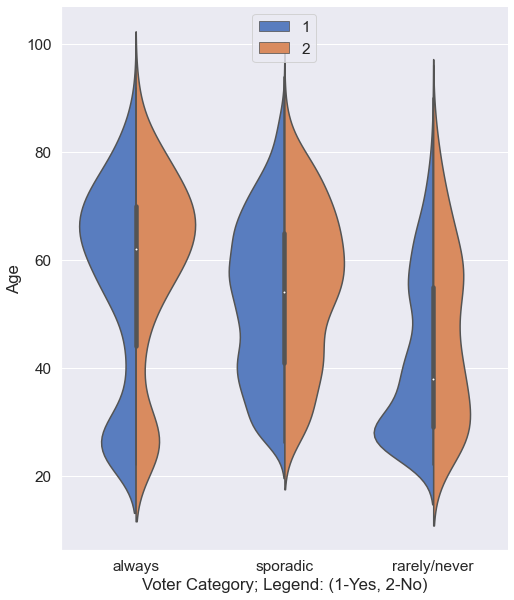

In [28]:
plt.rc("axes.spines", top=False, right=False)
plt.figure(figsize=(8,10))
violin_plot_2 = sns.violinplot(x = 'cat', y = 'ppage', hue = 'need_change', data = df4, palette = 'muted', split = True).set(xlabel = 'Voter Category; Legend: (1-Yes, 2-No)', ylabel = 'Age')
plt.legend(loc='upper center')

### Analysis

This analysis corresponds to research question 2 and details the following:
- the reason behind selection of the particular plots
- the inferences that can be drawn from the visual data in the form of pointers.

The formation and description of a conclusion on the basis of the analysis is detailed further in the conclusion section.

***Selection of specific plots***
- *Count plot*: This is one of the best choices when the count of a specific category needs to be put under analysis. It was chosed because it provides an easy way to see how many participants seek change in the design and structure of the American government. It allows us to study the difference between the selections (yes or no) based on their voter category too. Study of this plot is the easiest way to see visible difference, and its extent, between the two choices.
- *Violin plot*: These plots contain all the data points unline some others with mean and error bars. Also, they work well for both quantitative and qualitative data even when the data does not follow a normal distribution. In the current case though, it is one of the best choices when the plot consists of a categoric variable and a numeric variable with multiple numeric values corresponding to a cetegory. It allows us to study the difference between the selection made by the participants for whether change is required or not, on the basis of their age and voter category.

***Inferences drawn from the plots (in the form of pointers):***
- Plot 1
    - The bars for alternative 1 (Yes, a lot of changes are reuqired) are significantly higher than for its counterpart.
    - This trend is similar for both males and females.
    - This implies that there are, in general, more men and women who think that change is required than men and women who think otherwise respectively.
    - Note that the above point compares males to males and females to females (not males to females).
    - The bar for males is higher is case of 'no change' and lower in case of 'a lot of change' as compared to females.
    - This implies that, as compared to females, males find the need for change to be lower.
    - Consequently, the opposite is true for females.
    - The count of participants who seek change is more than 4 times the count of participants seeking no change.
- Plot 2
    - An inference which is helpful in general, but not much for the current research question is that the participants of higher age can again be seen to be the ones who vote more frequently.
    - Here, it can be seen that the choice is not clearly dependent of the category of voters except for the voters who rarely or never vote.
    - More of these non-frequent voters, who are of a younger age, seek change
    - The choices are not really age dependent either.
    - The only age dependence again can be seen in the case of participants who rarely/never vote.
    - The distribution of the choices on bases of age is quite uniform in the case of participants who vote sometimes or almost always.

### Conclusion

>***3*** *Do Americans think that the design and structure of the American Government need change? Does age play a role in this thinking?*

Based of the analysis of the two plots, it can be concluded that a fairly larger number of participants think that the design and structure of the American government needs change. This could possibly be because of the lack of trust by people in the current practices. The thinking for change is case of females can be viewed as slightly higher compared to males. This answers our research question. ***Americans think that the design and structure of the American Government need change and age plays only a minor role in it (that too in the case of participants who rarely or never vote).***

# End of Data Analysis

### ***Exporting processed data for dashboard***

In [29]:
df_proc = project_functions.load_and_process("../data/raw/nonvoters_data.csv", 5)
df_proc

,id,ppage,gender,educ,race,cat,voting_imp,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,difficulty,need_change
0,470001,73,Female,College,White,always,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,470002,90,Female,College,White,always,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
2,470003,53,Male,College,White,sporadic,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,470007,58,Female,Some college,Black,sporadic,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1
4,470008,68,Female,Some college,Other/Mixed,always,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,488266,59,Male,High school or less,Hispanic,always,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
5832,488274,44,Male,College,Hispanic,sporadic,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
5833,488278,40,Female,Some college,Hispanic,always,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
5834,488322,51,Male,College,Other/Mixed,sporadic,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2


In [30]:
df_proc.to_csv (r'../data/processed/processed_data.csv', index = True, header=True)

### ***End of exporting processed data for dashboard***